<a href="https://colab.research.google.com/github/sashavlasits/Data-Science/blob/main/Unit3/SashVlasU3proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install "preliz[full,notebook]"

In [3]:
!pip install arviz
!pip install pymc
import pandas as pd
import preliz as pz
import arviz as az
import pymc as pm
import numpy as np
import matplotlib.pyplot as plt

Context:

Music is an integral part of human society and culture. In recent years, Spotify has risen in prominence as a music streaming service, with a library of over 100 million songs, podcasts, audiobooks, and more. In my time as a music listener I have encountered songs of many different lengths. However, the breadth of the music I listen to is not very broad, so I was interested in expanding my horizons and seeing the average song length of songs in a larger dataset of Spotify's offerings to apporxiamate the length of songs in general.

My Assumptions:

I assume, based on nothing more than my experience listening to songs that the average length of songs on Spotify is between three and four minutes, given that most of the songs I listen to are around that length. So might as well split difference and guess that the mean will be about 3 minutes and 30 seconds. I would also assume that there would be a limited amout of variance. Obviously there would be no songs fewer than zero minutes, and I haven't seen many over 6 or 7 minutes. I would imagine that most songs would be concetrated in the 2.5 to 5 minute range, with some outliers.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
file_path = '/content/drive/MyDrive/spotify_data.csv'
spotify_databad = pd.read_csv(file_path)

In [6]:
spotify_databad
#yale put the data in

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.1390,133.406,240166,3
1,1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.5150,140.182,216387,4
2,2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.1450,139.832,158960,4
3,3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.5080,204.961,304293,4
4,4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.2170,171.864,244320,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159759,1473391,Nicola Conte,Black Spirits,0m27F0IGHLGAWhqd6ccYst,4,2011,trip-hop,0.373,0.742,10,-6.453,0,0.0736,0.3250,0.000141,0.1590,0.5220,107.951,344013,3
1159760,1473392,Nicola Conte,Quiet Dawn,6er9p611eHEcUCU50j7D57,3,2011,trip-hop,0.516,0.675,7,-7.588,0,0.0326,0.7880,0.000129,0.1300,0.2640,119.897,285067,4
1159761,1473393,Amon Tobin,Morning Ms Candis,7jsMMqxy1tt0rH5FzYcZTQ,2,2011,trip-hop,0.491,0.440,5,-8.512,1,0.0274,0.4770,0.003130,0.0936,0.0351,100.076,214253,4
1159762,1473394,Peace Orchestra,Happy Christmas (War Is Over),77lA1InUaXztuRk2vOzD1S,0,2011,trip-hop,0.480,0.405,0,-13.343,1,0.0276,0.4310,0.000063,0.1250,0.2020,133.885,239133,3


In [6]:
##cleared the data of gross outliers that undermine my plans
spotify_data = spotify_databad.query('1000000 > duration_ms > 0')
spotify_data

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.1390,133.406,240166,3
1,1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.5150,140.182,216387,4
2,2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.1450,139.832,158960,4
3,3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.5080,204.961,304293,4
4,4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.2170,171.864,244320,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159759,1473391,Nicola Conte,Black Spirits,0m27F0IGHLGAWhqd6ccYst,4,2011,trip-hop,0.373,0.742,10,-6.453,0,0.0736,0.3250,0.000141,0.1590,0.5220,107.951,344013,3
1159760,1473392,Nicola Conte,Quiet Dawn,6er9p611eHEcUCU50j7D57,3,2011,trip-hop,0.516,0.675,7,-7.588,0,0.0326,0.7880,0.000129,0.1300,0.2640,119.897,285067,4
1159761,1473393,Amon Tobin,Morning Ms Candis,7jsMMqxy1tt0rH5FzYcZTQ,2,2011,trip-hop,0.491,0.440,5,-8.512,1,0.0274,0.4770,0.003130,0.0936,0.0351,100.076,214253,4
1159762,1473394,Peace Orchestra,Happy Christmas (War Is Over),77lA1InUaXztuRk2vOzD1S,0,2011,trip-hop,0.480,0.405,0,-13.343,1,0.0276,0.4310,0.000063,0.1250,0.2020,133.885,239133,3


Data Collection:

I got this data from a random kaggle data set that I found from Reddit. It is supposedly a sample of 1.2 million songs from the Spotify library, but I am not sure how they collected it as they did not disclosed. I then did my own random sample of 10000 of these songs, because I didn't want my computer to have a stroke and die (spoiler alert: it did anyway). This data has lots of other data in it, but I am only interested in the column about the length.

In [7]:
#google ai helped me
num_samples = np.random.randint(10000, len(spotify_data['duration_ms']) + 1) # +1 because randint is exclusive of high value
random_sample = np.random.choice(spotify_data['duration_ms'], size=num_samples, replace=False)

print(f"Original array: {spotify_data['duration_ms']}")
print(f"Number of elements sampled: {num_samples}")
print(f"Random sample: {random_sample}")

Original array: 0          240166
1          216387
2          158960
3          304293
4          244320
            ...  
1159759    344013
1159760    285067
1159761    214253
1159762    239133
1159763    212227
Name: duration_ms, Length: 1155943, dtype: int64
Number of elements sampled: 426428
Random sample: [237907 159634 228453 ... 206067  75227 218253]


In [8]:
#google ai helped me
num_samples = np.random.randint(100, len(spotify_data['duration_ms']) + 1) # +1 because randint is exclusive of high value
random_sample2 = np.random.choice(spotify_data['duration_ms'], size=num_samples, replace=False)

print(f"Original array: {spotify_data['duration_ms']}")
print(f"Number of elements sampled: {num_samples}")
print(f"Random sample: {random_sample2}")

Original array: 0          240166
1          216387
2          158960
3          304293
4          244320
            ...  
1159759    344013
1159760    285067
1159761    214253
1159762    239133
1159763    212227
Name: duration_ms, Length: 1155943, dtype: int64
Number of elements sampled: 481368
Random sample: [272045 224333 419093 ... 159907 197175 212933]


(array([ 21321., 157536., 202192.,  63863.,  23912.,   7619.,   2585.,
          1205.,    667.,    468.]),
 array([  4000. , 103597.6, 203195.2, 302792.8, 402390.4, 501988. ,
        601585.6, 701183.2, 800780.8, 900378.4, 999976. ]),
 <BarContainer object of 10 artists>)

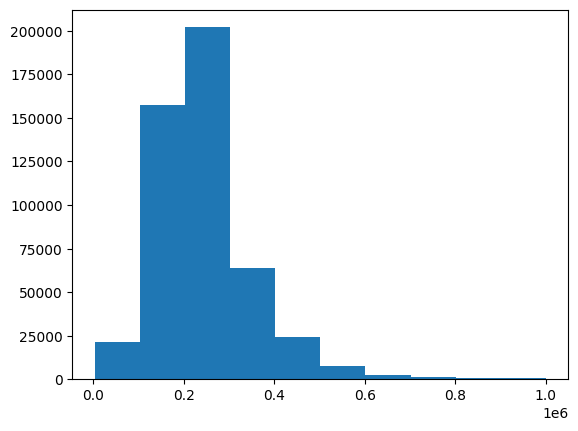

In [10]:
plt.hist(random_sample2)

Distribution Description:

Based on the histogram, I would say that the mean length is a little over 200,000 milliseconds, or 3.33 minutes. The distribution is skewed right with a range of zero to about 16.5 minutes. There are clearly several high outliers with lengths of over 10 minutes. Insofar as shape, the data looks similar to a somewhat skewed normal distribution or even something as fancy as a Gumbel or an Ex-Gaussian.

<Axes: >

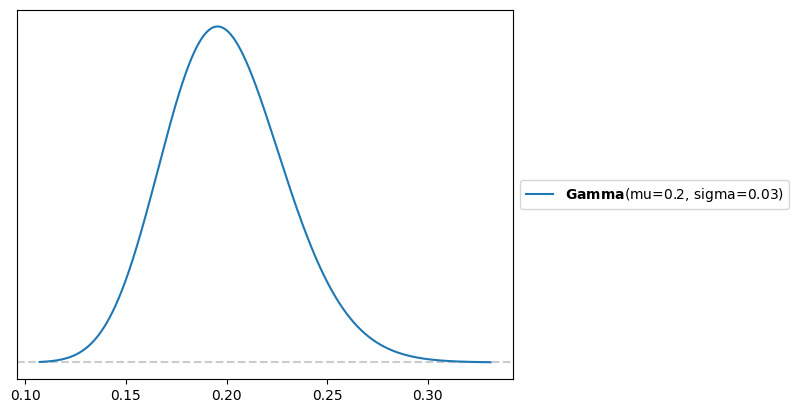

In [11]:
#this is a Gamma
pz.Gamma (mu=.2, sigma=.03).plot_pdf()

In [ ]:
with pm.Model() as model_random_sample:
  μ = pm.Gamma ('μ', mu = 200000, sigma = 100000)
  σ = pm.Gamma ('σ', mu = 200000, sigma = 100000)
  Y = pm.Gamma ('Y', mu = μ, sigma = σ, observed=random_sample)
  idata_random_sample = pm.sample()

array([<Axes: title={'center': 'μ'}>, <Axes: title={'center': 'σ'}>],
      dtype=object)

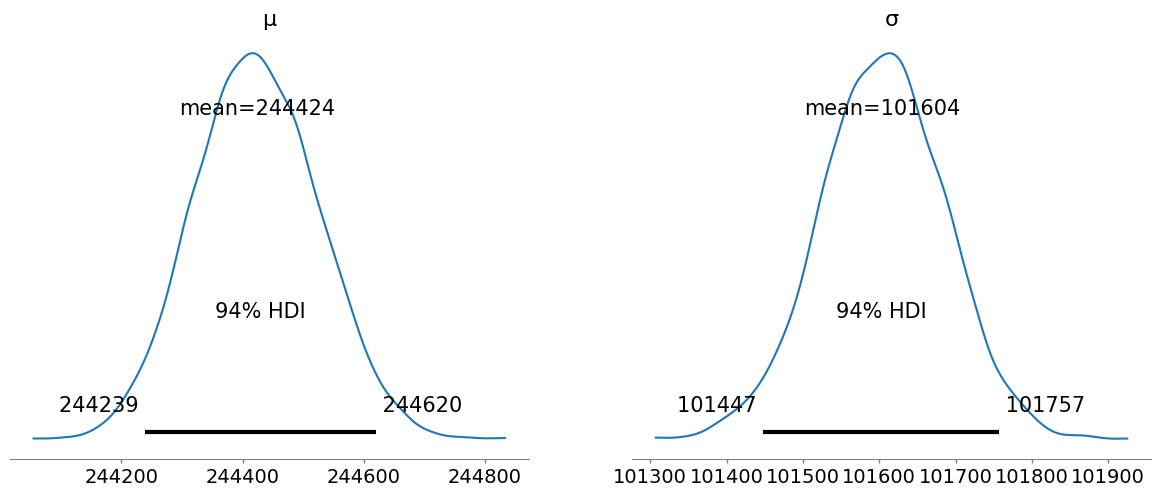

In [13]:
az.plot_posterior(idata_random_sample)

In [ ]:
pm.sample_posterior_predictive(idata_random_sample, model=model_random_sample, extend_inferencedata=True)

<Axes: xlabel='Y'>

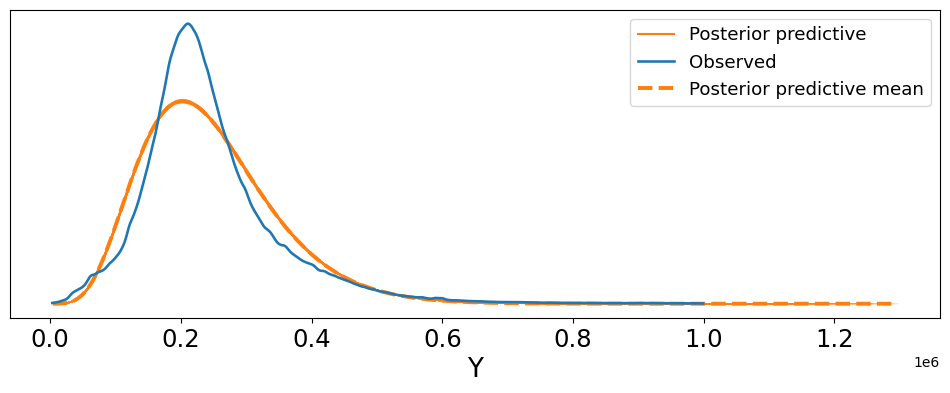

In [15]:
az.plot_ppc(idata_random_sample, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])

Discussion of the model:

This model is pretty good! The mean seems to be relatively close to both the mean of my data and the mean that I expected, though the model I made seems to have more variance than the actual data. Basically, the data just needs to be concentrated closer to the mean. I am going to try a moyal distribution next, largely because Mr. Arredondo told me I should. Also, based on the picture in the gallary, the moyal looks more like the shape of my histogram.

<Axes: >

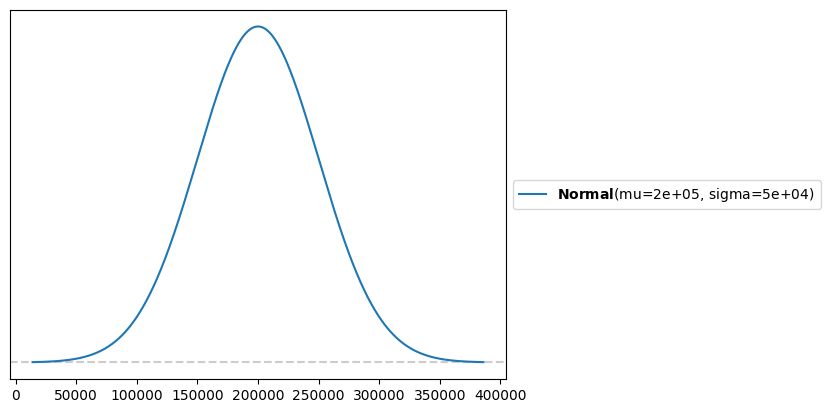

In [23]:
#this is the normal
pz.Normal(mu=200000, sigma=50000).plot_pdf()

In [ ]:
with pm.Model() as model_random_sample2:
  μ = pm.Normal ('μ', mu = 200000, sigma = 100)
  σ = pm.HalfNormal ('σ', sigma = 5000)
  Y = pm.Normal ('Y', mu = μ, sigma = σ, observed=random_sample2)
  idata_random_sample2 = pm.sample()

array([<Axes: title={'center': 'μ'}>, <Axes: title={'center': 'σ'}>],
      dtype=object)

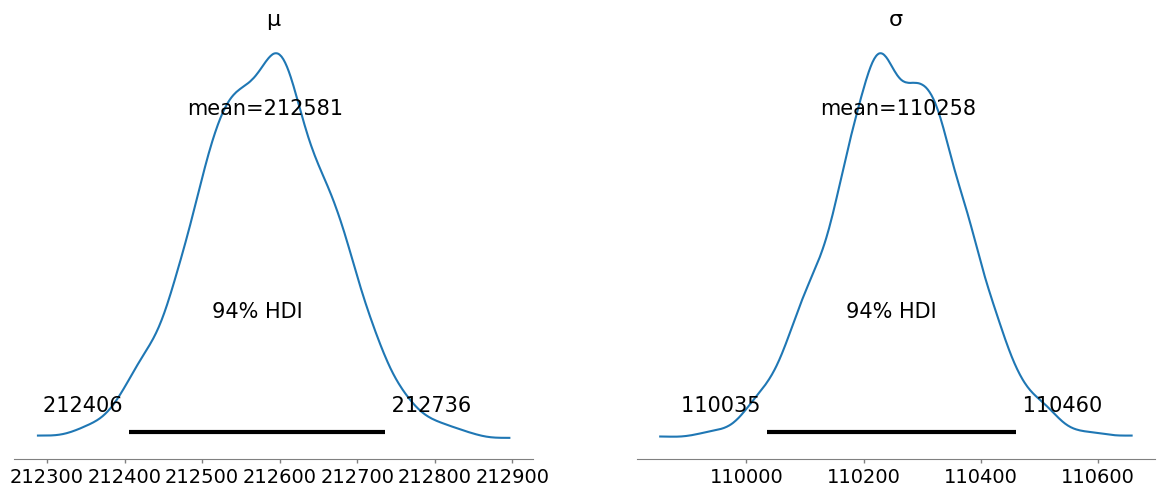

In [20]:
az.plot_posterior(idata_random_sample2)

In [ ]:
pm.sample_posterior_predictive(idata_random_sample2, model=model_random_sample2, extend_inferencedata=True)

<Axes: xlabel='Y'>

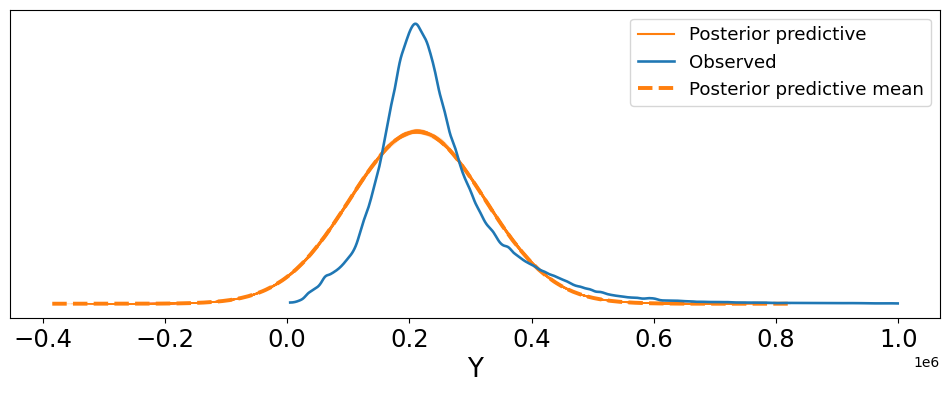

In [22]:
az.plot_ppc(idata_random_sample2, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])

Discussion of the Model:

This distribution is not a very good model because it is normal. It is only normal because none of the other distrivutions would run on this gosh darn computer, causing me a world of grief and anguish. This is all I could manage, and it's what you're going to get. It doesn't match the curve very well, and generates some negative values, which is not consititent with reality because you can't have negative time. It also has too much varience, but I can't change that because it might stop running again and I will cry.

Conclusion:

Neither of the models I created are very good at modelling the real world, but most of that is not my fault. However, the gamma distribution one is much better, because it is at least limited to positive numbers and fits the rightward skew of the original curve. However, this doesn't even make much sense, because the gamma is supposed to model a process where events happen randomly at a constant average rate, which is definetly not what's happening with song lengths. I think we're just going to have to call it a day with this one, and accept that some songs are sort of long, some are shorter, and a lot of them are like 2.5 minutes long.

